# Final Project Stage 2 - Data Preprocessing
# Kelompok 7A - OCTAGRAM
ALFAROQIH SWANDI <br>
ARIEF SULISTYO WIBOWO <br>
CICILIA RUMANAT SIAHAAN <br>
MARIFATUL HASANAH <br>
RAHMAT DIZA RAMADHAN <br>
WILSON FIRMANDA MANURUNG <br>
YANSEN CRISTOPEL SINAGA <br>
YULIA ROHMAWATI <br>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

In [ ]:
df = pd.read_csv('Churn_Modelling.csv')
df

FileNotFoundError: ignored

#### Feature Dataset
- Customer ID : Merepresentasikan identifikasi unik nasabah
- Surname : Merepresentasikan nama nasabah
- CreditScore : Merepresentasikan angka yang mengestimasi kemampuan nasabah dalam melunasi utangnya tepat waktu
- Geography : Merepresentasikan wilayah nasabah
- Gender : Merepresentasikan jenis kelamin nasabah (male or female)
- Age: Merepresentasikan usia nasabah
- Tenure : Merepresentasikan jangka waktu pinjaman nasabah
- Balance : Merepresentasikan saldo pada akun nasabah
- NumOfProducts : Merepresentasikan jumlah produk yang digunakan atau dimiliki oleh nasabah
- HasCrCard : Merepresentasikan kepemilikan nasabah akan kartu kredit
- IsActiveMember : Merepresentasikan apakah member nasabah aktif atau tidak
- EstimatedSalary : Merepresentasikan estimasi gaji nasabah
- Exited : Merepresentasikan nasabah churn atau tidak oleh nasabah

## EDA

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info() #data sudah sesuai

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.describe(exclude=np.number)

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


## Handle Duplicated Data

In [ ]:
df.duplicated() #tidak ada data duplikat

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

## Handle Missing Values

In [ ]:
df.isnull().sum() #tidak ada data missing value

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### Penjelasan
Setiap feature memiliki nilai yang valid dan sesuai, tidak terdapat missing value, tidak terdapat duplikat. Sehingga tidak ada yang perlu dilakukan terkait hal tersebut.

In [ ]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
Categoric = ['Geography','Gender', 'HasCrCard','IsActiveMember', 'Exited']
Numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary','NumOfProducts']

## Handle Outlier

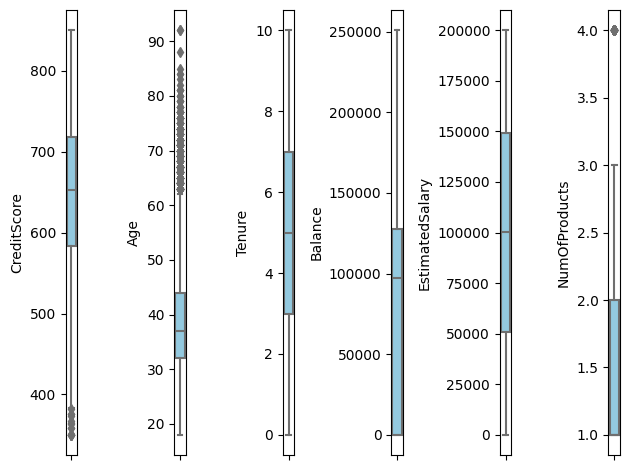

In [ ]:
for i in range(0, len(Numeric)):
  plt.subplot(1, len(Numeric), i+1)
  sns.boxplot(y=df[Numeric[i]], color='skyblue', orient='v')
  plt.tight_layout()

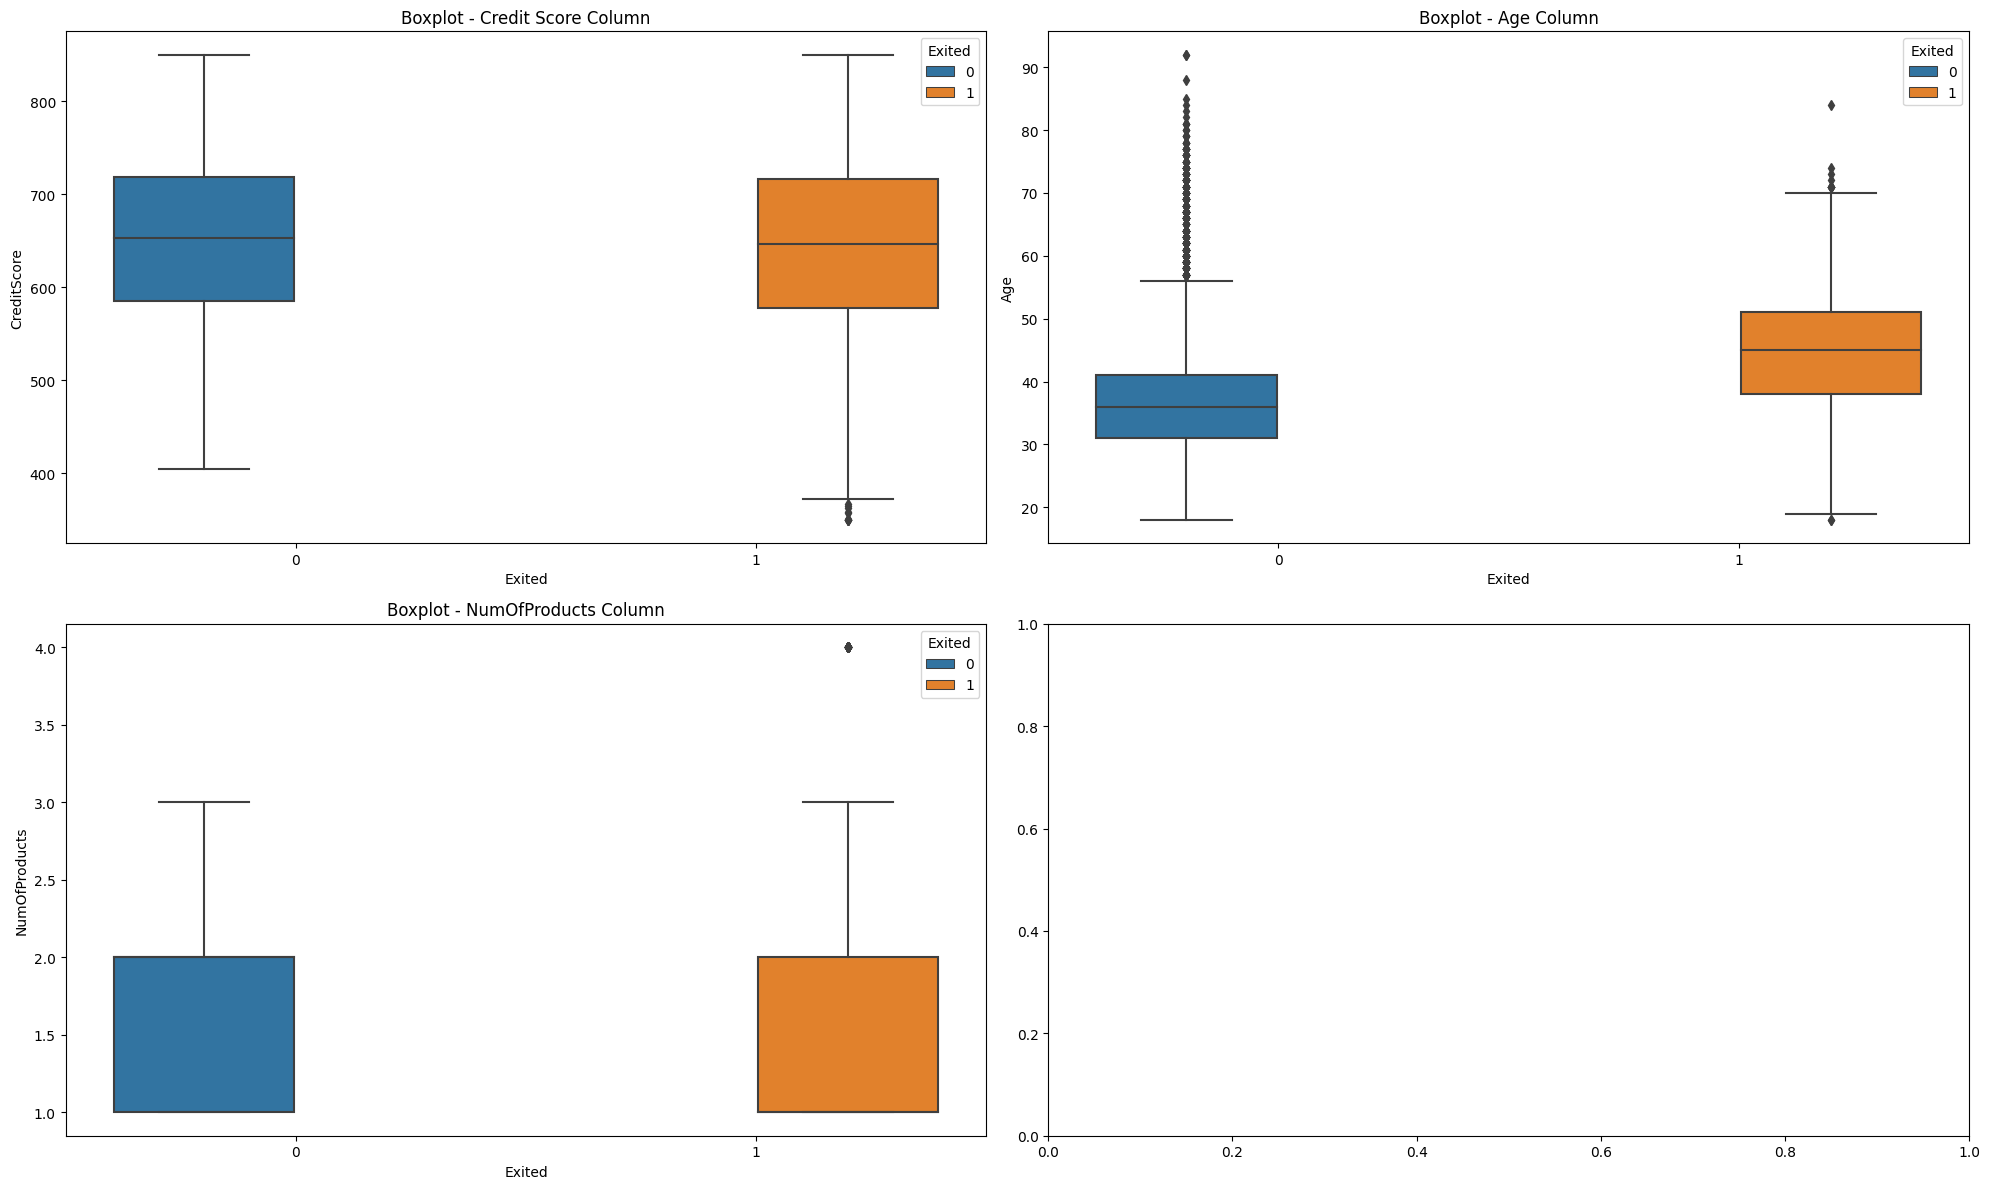

In [ ]:
#hubungan kolom yang memiliki data outlier dengan kolom 'Exited'
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))

sns.boxplot(y='CreditScore', x='Exited', hue='Exited', data=df, ax=axarr[0][0]).set_title('Boxplot - Credit Score Column')
sns.boxplot(y='Age', x='Exited', hue='Exited', data=df, ax=axarr[0][1]).set_title('Boxplot - Age Column')
sns.boxplot(y='NumOfProducts', x='Exited', hue='Exited', data=df, ax=axarr[1][0]).set_title('Boxplot - NumOfProducts Column')
plt.tight_layout()
plt.show()

#### Penjelasan
Terdapat outlier pada feature 'Credit Score', 'Age', 'Num of Products' <br>
--> Outlier tidak didrop atau dihandle. Outlier akan **tetap digunakan** karena data outlier kebanyakan merupakan data yang churn yang apabila didrop dapat menghilangkan informasi atau merusak data. Oleh karena itu metode yang akan digunakan adalah metode yang robust terhadap outlier.

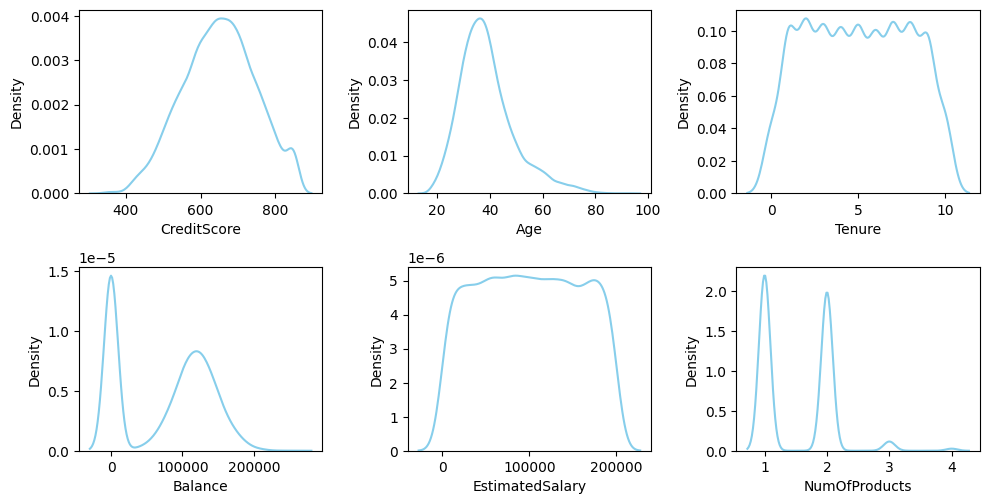

In [ ]:
#distribusi data
plt.figure(figsize=(10, 15))
for i in range(0, len(Numeric)):
  plt.subplot(len(Numeric), 3, i+1)
  sns.kdeplot(x=df[Numeric[i]], color='skyblue')
  plt.xlabel(Numeric[i])
  plt.tight_layout()

In [ ]:
#Uji Normalitas
import scipy.stats as stats

#Credit Score
#Hipotesis
# H0 : Data Credit Score terdistribusi secara normal
# H1 : Data Credit Score tidak terdistribusi secara normal

#Uji normalitas Kolmogorov-Smirnov
kstest_CS = stats.kstest(df['CreditScore'], 'norm')

#Hasil uji normalitas
print("Hasil uji normalitas Kolmogorov-Smirnov Credit Score:")
print("Statistic:", kstest_CS.statistic)
print("P-value:", kstest_CS.pvalue)

#Interpretasi hasil
#Jika p-value < alpha -> Tolak H0
alpha = 0.05
if kstest_CS.pvalue > alpha:
    print("Gagal Tolak H0: Data Credit Score terdistribusi secara normal")
else:
    print("Tolak H0: Data Credit Score tidak terdistribusi secara normal")
    print("=============================================================")


#Age
#Hipotesis
# H0 : Data Age terdistribusi secara normal
# H1 : Data Age tidak terdistribusi secara normal

#Uji normalitas Kolmogorov-Smirnov
kstest_Age = stats.kstest(df['Age'], 'norm')

#Hasil uji normalitas
print("Hasil uji normalitas Kolmogorov-Smirnov Age:")
print("Statistic:", kstest_Age.statistic)
print("P-value:", kstest_Age.pvalue)

#Interpretasi hasil
#Jika p-value < alpha -> Tolak H0
alpha = 0.05
if kstest_Age.pvalue > alpha:
    print("Gagal Tolak H0: Data Age terdistribusi secara normal")
else:
    print("Tolak H0: Data Age tidak terdistribusi secara normal")
    print("=============================================================")

#Tenure
#Hipotesis
# H0 : Data Tenure terdistribusi secara normal
# H1 : Data Tenure tidak terdistribusi secara normal

#Uji normalitas Kolmogorov-Smirnov
kstest_Tenure = stats.kstest(df['Tenure'], 'norm')

#Hasil uji normalitas
print("Hasil uji normalitas Kolmogorov-Smirnov Tenure:")
print("Statistic:", kstest_Tenure.statistic)
print("P-value:", kstest_Tenure.pvalue)

#Interpretasi hasil
#Jika p-value < alpha -> Tolak H0
alpha = 0.05
if kstest_Tenure.pvalue > alpha:
    print("Gagal Tolak H0: Data Tenure terdistribusi secara normal")
else:
    print("Tolak H0: Data Tenure tidak terdistribusi secara normal")
    print("=============================================================")

#Balance
#Hipotesis
# H0 : Data Balance terdistribusi secara normal
# H1 : Data Balance tidak terdistribusi secara normal

#Uji normalitas Kolmogorov-Smirnov
kstest_Balance = stats.kstest(df['Balance'], 'norm')

#Hasil uji normalitas
print("Hasil uji normalitas Kolmogorov-Smirnov Balance:")
print("Statistic:", kstest_Balance.statistic)
print("P-value:", kstest_Balance.pvalue)

#Interpretasi hasil
#Jika p-value < alpha -> Tolak H0
alpha = 0.05
if kstest_Balance.pvalue > alpha:
    print("Gagal Tolak H0: Data Balance terdistribusi secara normal")
else:
    print("Tolak H0: Data Balance tidak terdistribusi secara normal")
    print("=============================================================")

#Estimated Salary
#Hipotesis
# H0 : Data Estimated Salary terdistribusi secara normal
# H1 : Data Estimated Salary tidak terdistribusi secara normal

#Uji normalitas Kolmogorov-Smirnov
kstest_ES = stats.kstest(df['EstimatedSalary'], 'norm')

#Hasil uji normalitas
print("Hasil uji normalitas Kolmogorov-Smirnov Estimated Salary:")
print("Statistic:", kstest_ES.statistic)
print("P-value:", kstest_ES.pvalue)

#Interpretasi hasil
#Jika p-value < alpha -> Tolak H0
alpha = 0.05
if kstest_ES.pvalue > alpha:
    print("Gagal Tolak H0: Data Esitimated Salary terdistribusi secara normal")
else:
    print("Tolak H0: Data Estimated Salary tidak terdistribusi secara normal")
    print("=============================================================")

#Num Of Products
#Hipotesis
# H0 : Data Num Of Products terdistribusi secara normal
# H1 : Data Num Of Products tidak terdistribusi secara normal

#Uji normalitas Kolmogorov-Smirnov
kstest_NP = stats.kstest(df['NumOfProducts'], 'norm')

#Hasil uji normalitas
print("Hasil uji normalitas Kolmogorov-Smirnov Num Of Products:")
print("Statistic:", kstest_NP.statistic)
print("P-value:", kstest_NP.pvalue)

#Interpretasi hasil
#Jika p-value < alpha -> Tolak H0
alpha = 0.05
if kstest_NP.pvalue > alpha:
    print("Gagal Tolak H0: Data Num Of Products terdistribusi secara normal")
else:
    print("Tolak H0: Data Num Of Products tidak terdistribusi secara normal")

Hasil uji normalitas Kolmogorov-Smirnov Credit Score:
Statistic: 1.0
P-value: 0.0
Tolak H0: Data Credit Score tidak terdistribusi secara normal
Hasil uji normalitas Kolmogorov-Smirnov Age:
Statistic: 1.0
P-value: 0.0
Tolak H0: Data Age tidak terdistribusi secara normal
Hasil uji normalitas Kolmogorov-Smirnov Tenure:
Statistic: 0.8324498680518208
P-value: 0.0
Tolak H0: Data Tenure tidak terdistribusi secara normal
Hasil uji normalitas Kolmogorov-Smirnov Balance:
Statistic: 0.6383
P-value: 0.0
Tolak H0: Data Balance tidak terdistribusi secara normal
Hasil uji normalitas Kolmogorov-Smirnov Estimated Salary:
Statistic: 1.0
P-value: 0.0
Tolak H0: Data Estimated Salary tidak terdistribusi secara normal
Hasil uji normalitas Kolmogorov-Smirnov Num Of Products:
Statistic: 0.8413447460685429
P-value: 0.0
Tolak H0: Data Num Of Products tidak terdistribusi secara normal


- Kolom Credit Score, Age, Tenure, Balance, Estimated Salary dan Num Of Products tidak berdistribusi normal
- Berdasarkan distribusi Plot Age merupakan distribusi Positively Skewed.
- Berdasarkan distribusi Plot kolom Balance berdistribusi bimodal

## Feature Encoding

In [ ]:
#Label encoding untuk feature gender

mapping_gender = {
  'Male' : 1,
  'Female' : 0
}
df['Gender'] = df['Gender'].map(mapping_gender)
df.head(7)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,1,44,8,113755.78,2,1,0,149756.71,1
6,822,France,1,50,7,0.00,2,1,1,10062.80,0


In [ ]:
#One Hot Encoding untuk feature geography
geo_encod = pd.get_dummies(df['Geography'], prefix='country')
geo_encod

,country_France,country_Germany,country_Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [ ]:
#Merge Dataframe geo_encod dengan dataframe utama
new_df = pd.concat([df, geo_encod], axis=1)
new_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain
0,619,France,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [ ]:
#Drop feature geo dan merubah nama feature hasil encode dari geography
df2 = new_df.drop(['Geography'], axis=1)
df2.rename(
    columns={"country_France": "France", "country_Germany": "Germany", "country_Spain": "Spain"},
    inplace=True,
)

df2.head(7)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
5,645,1,44,8,113755.78,2,1,0,149756.71,1,0,0,1
6,822,1,50,7,0.00,2,1,1,10062.80,0,1,0,0


## Feature Transformation

In [ ]:
#Robust Scalling
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
Numeric = ['CreditScore', 'Balance', 'EstimatedSalary', 'NumOfProducts', 'Tenure', 'Age']
data_RS = df2.copy()
data_RS[Numeric] = scaler.fit_transform(data_RS[Numeric])
data_RS

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,-0.246269,0,0.416667,-0.75,-0.761480,0.0,1,1,0.011739,1,1,0,0
1,-0.328358,0,0.333333,-1.00,-0.104906,0.0,0,1,0.125512,0,0,0,1
2,-1.119403,0,0.416667,0.75,0.489346,2.0,1,0,0.139630,1,1,0,0
3,0.350746,0,0.166667,-1.00,-0.761480,1.0,0,0,-0.064717,0,1,0,0
4,1.477612,0,0.500000,-0.75,0.221806,0.0,1,1,-0.214561,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.888060,1,0.166667,0.00,-0.761480,1.0,1,0,-0.039876,0,1,0,0
9996,-1.014925,1,-0.166667,1.25,-0.312031,0.0,1,1,0.015306,0,1,0,0
9997,0.425373,0,-0.083333,0.50,-0.761480,0.0,0,1,-0.590615,1,1,0,0
9998,0.895522,1,0.416667,-0.50,-0.173319,1.0,1,0,-0.074252,1,0,1,0


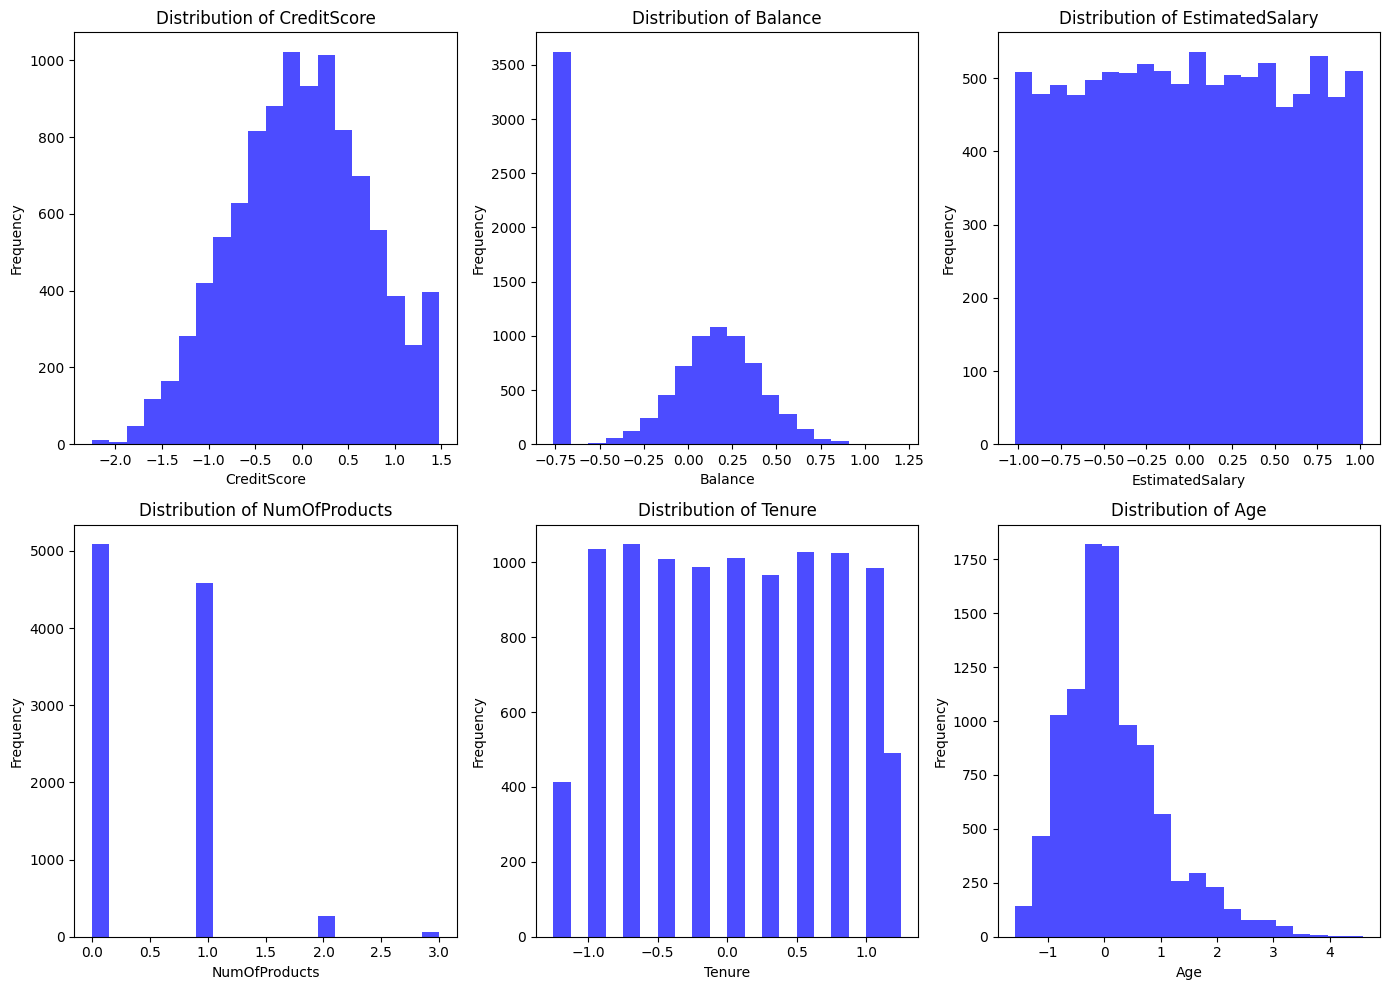

In [ ]:
#Visualisasi Distribusi Plot
NT = ['CreditScore', 'Balance', 'EstimatedSalary', 'NumOfProducts', 'Tenure', 'Age']
data_NT = data_RS[NT]

plt.figure(figsize=(14, 10))

for i, column in enumerate(data_NT.columns):
    plt.subplot(2, 3, i + 1)
    plt.hist(data_NT[column], bins=20, color='blue', alpha=0.7)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

In [ ]:
#Log Transformation -> Tidak dapat diterapkan karena pada feature "Balance" terdapat nilai 0 atau negatif sehingga hasil transformasi menjadi -inf
Numeric = ['CreditScore', 'Balance', 'EstimatedSalary', 'NumOfProducts', 'Tenure', 'Age']
data_log = df2.copy()

for column in Numeric:
    data_log[column] = np.log(data_log[column])

data_log

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,6.428105,0,3.737670,0.693147,-inf,0.000000,1,1,11.526324,1,1,0,0
1,6.410175,0,3.713572,0.000000,11.336282,0.000000,0,1,11.631087,0,0,0,1
2,6.218600,0,3.737670,2.079442,11.980807,1.098612,1,0,11.643353,1,1,0,0
3,6.549651,0,3.663562,0.000000,-inf,0.693147,0,0,11.449204,0,1,0,0
4,6.745236,0,3.761200,0.693147,11.740147,0.000000,1,1,11.278267,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6.647688,1,3.663562,1.609438,-inf,0.693147,1,0,11.474919,0,1,0,0
9996,6.246107,1,3.555348,2.302585,10.957270,0.000000,1,1,11.529780,0,1,0,0
9997,6.563856,0,3.583519,1.945910,-inf,0.000000,0,1,10.647460,1,1,0,0
9998,6.648985,1,3.737670,1.098612,11.226247,0.693147,1,0,11.439155,1,0,1,0


In [ ]:
#Box-Cox Transformation -> Tidak dapat dilakukan karena terdapat kolom bernilai negatif

In [ ]:
#Quantile Transformation
from sklearn.preprocessing import QuantileTransformer

transformer = QuantileTransformer(output_distribution='normal')
Numeric = ['CreditScore', 'Balance', 'EstimatedSalary', 'NumOfProducts', 'Tenure', 'Age']
data_Quantile = df2.copy()
data_Quantile[Numeric] = transformer.fit_transform(data_Quantile[Numeric])

data_Quantile

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,-0.326900,0,0.507774,-0.851675,-5.199338,-5.199338,1,1,0.017398,1,1,0,0
1,-0.429351,0,0.412900,-1.321946,-0.161718,-5.199338,0,1,0.161057,0,0,0,1
2,-1.497997,0,0.507774,0.846279,1.564611,2.074445,1,0,0.178525,1,1,0,0
3,0.476619,0,0.195700,-1.321946,-5.199338,0.636387,0,0,-0.074071,0,1,0,0
4,5.199338,0,0.598435,-0.851675,0.616983,-5.199338,1,1,-0.273008,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.202347,1,0.195700,0.000000,-5.199338,0.636387,1,0,-0.042705,0,1,0,0
9996,-1.346386,1,-0.275694,5.199338,-0.320994,-5.199338,1,1,0.021737,0,1,0,0
9997,0.582009,0,-0.156199,0.520661,-5.199338,-5.199338,0,1,-0.818984,1,1,0,0
9998,1.212751,1,0.507774,-0.523537,-0.242309,0.636387,1,0,-0.089924,1,0,1,0


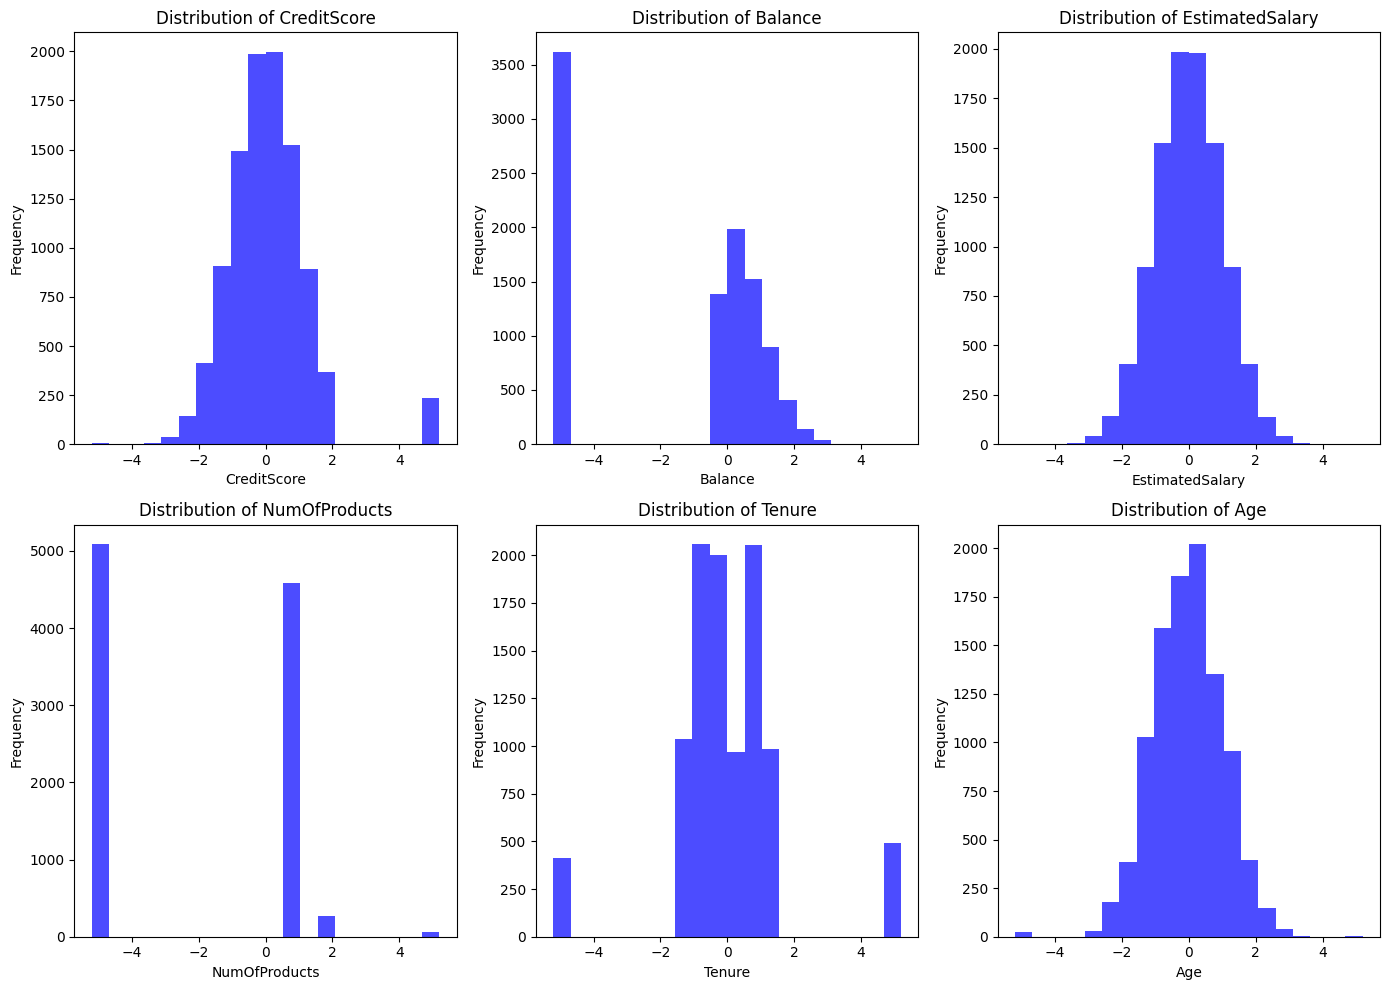

In [ ]:
#Visualisasi Distribusi Plot
NT = ['CreditScore', 'Balance', 'EstimatedSalary', 'NumOfProducts', 'Tenure', 'Age']
data_NT = data_Quantile[NT]

plt.figure(figsize=(14, 10))

for i, column in enumerate(data_NT.columns):
    plt.subplot(2, 3, i + 1)
    plt.hist(data_NT[column], bins=20, color='blue', alpha=0.7)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

In [ ]:
#Min-Max Scalling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
Numeric = ['CreditScore', 'Balance', 'EstimatedSalary', 'NumOfProducts', 'Tenure', 'Age']

data_minmax = df2.copy()
data_minmax[Numeric] = scaler.fit_transform(data_minmax[Numeric])

data_minmax

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,1,0.283784,0.5,0.000000,0.333333,1,0,0.481341,0,1,0,0
9996,0.332,1,0.229730,1.0,0.228657,0.000000,1,1,0.508490,0,1,0,0
9997,0.718,0,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1,1,0,0
9998,0.844,1,0.324324,0.3,0.299226,0.333333,1,0,0.464429,1,0,1,0


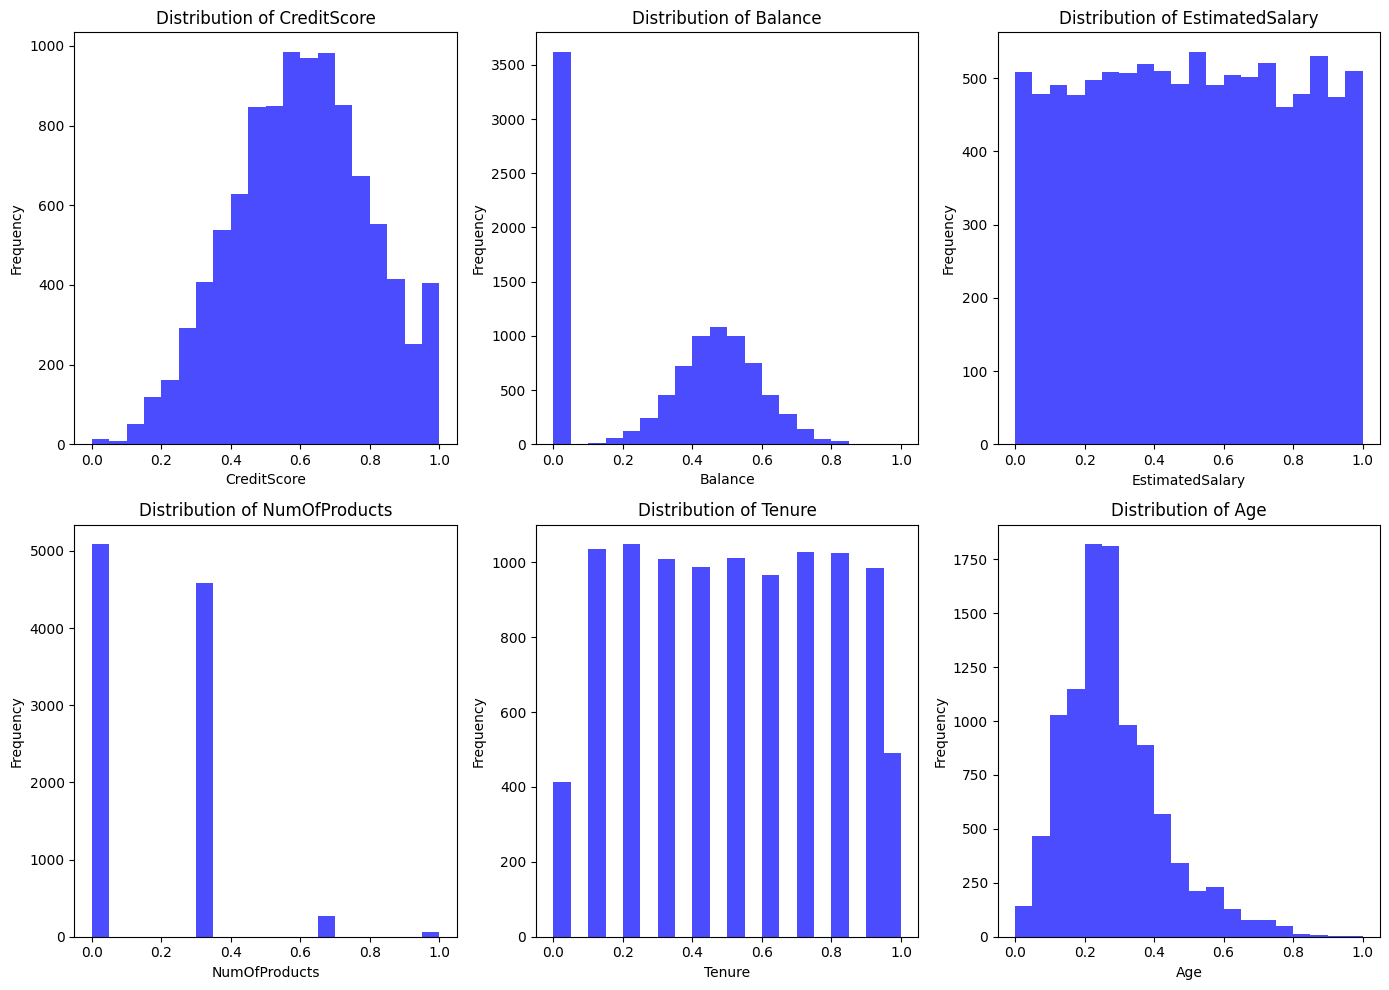

In [ ]:
#Visualisasi Distribusi Plot
NT = ['CreditScore', 'Balance', 'EstimatedSalary', 'NumOfProducts', 'Tenure', 'Age']
data_NT = data_minmax[NT]

plt.figure(figsize=(14, 10))

for i, column in enumerate(data_NT.columns):
    plt.subplot(2, 3, i + 1)
    plt.hist(data_NT[column], bins=20, color='blue', alpha=0.7)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

#### Penjelasan
Metode Feature Transformation yang digunakan adalah Metode Robust Scalling.

## Handle Class Imbalance

In [ ]:
data = data_RS.copy()
data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,-0.246269,0,0.416667,-0.75,-0.761480,0.0,1,1,0.011739,1,1,0,0
1,-0.328358,0,0.333333,-1.00,-0.104906,0.0,0,1,0.125512,0,0,0,1
2,-1.119403,0,0.416667,0.75,0.489346,2.0,1,0,0.139630,1,1,0,0
3,0.350746,0,0.166667,-1.00,-0.761480,1.0,0,0,-0.064717,0,1,0,0
4,1.477612,0,0.500000,-0.75,0.221806,0.0,1,1,-0.214561,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.888060,1,0.166667,0.00,-0.761480,1.0,1,0,-0.039876,0,1,0,0
9996,-1.014925,1,-0.166667,1.25,-0.312031,0.0,1,1,0.015306,0,1,0,0
9997,0.425373,0,-0.083333,0.50,-0.761480,0.0,0,1,-0.590615,1,1,0,0
9998,0.895522,1,0.416667,-0.50,-0.173319,1.0,1,0,-0.074252,1,0,1,0


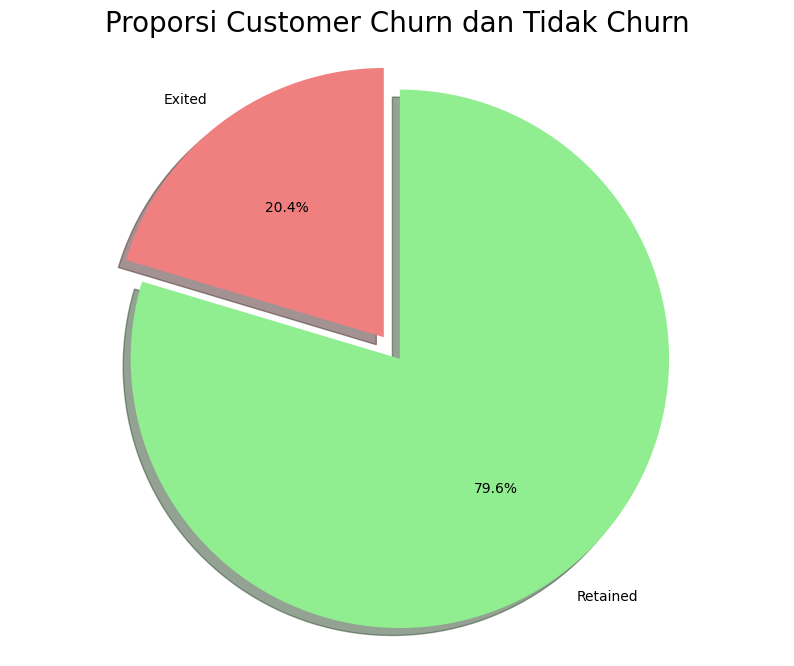

In [ ]:
#Feature Exited
labels = 'Exited', 'Retained'
sizes = [data.Exited[data['Exited']==1].count(), data.Exited[data['Exited']==0].count()]
colors = ['lightcoral', 'lightgreen']
explode = (0, 0.1)
#Pie Chart
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
ax1.axis('equal')
plt.title("Proporsi Customer Churn dan Tidak Churn", size = 20)
plt.show()

In [ ]:
#SMOTE
from imblearn.over_sampling import SMOTE

#Feature X dan Y
X = data.drop('Exited', axis=1)
y = data['Exited']

#Handling Class Imbalance
smote = SMOTE(random_state=1)
X_resampled, y_resampled = smote.fit_resample(X, y)

#Hasil SMOTE
df_SMOTE = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['Exited'])], axis=1)

exited_counts = df_SMOTE['Exited'].value_counts()
print("Jumlah data setelah SMOTE:", len(df_SMOTE))
print(exited_counts)

Jumlah data setelah SMOTE: 15926
1    7963
0    7963
Name: Exited, dtype: int64


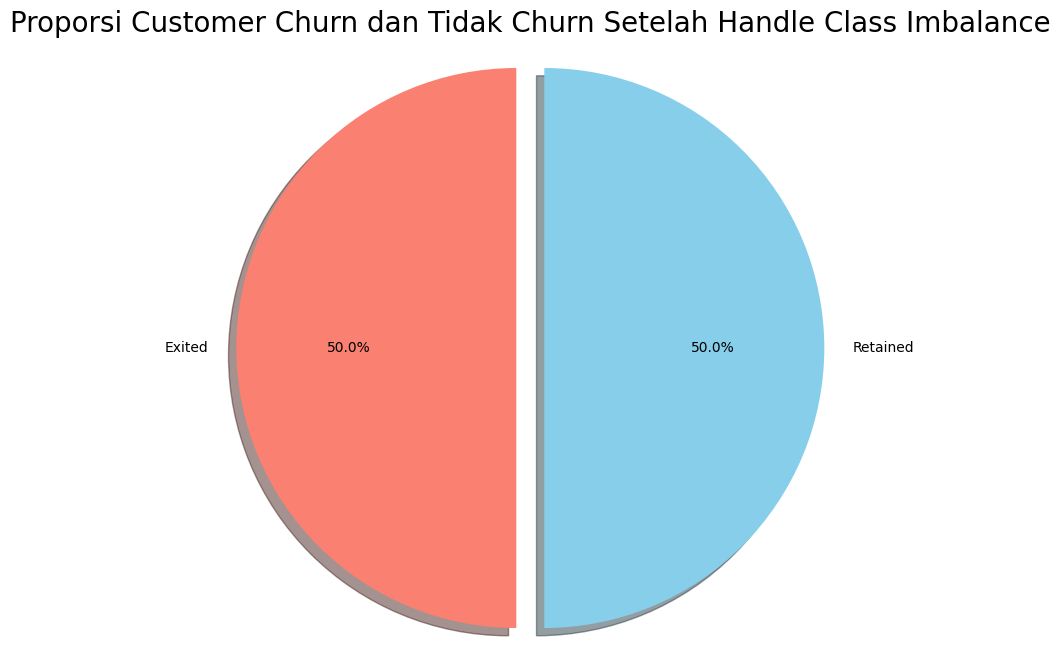

In [ ]:
#Visualisasi setelah handle class imbalance
#Feature Exited
labels = 'Exited', 'Retained'
sizes = [df_SMOTE.Exited[df_SMOTE['Exited']==1].count(), df_SMOTE.Exited[df_SMOTE['Exited']==0].count()]
colors = ['salmon', 'skyblue']
explode = (0, 0.1)
#Pie Chart
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
ax1.axis('equal')
plt.title("Proporsi Customer Churn dan Tidak Churn Setelah Handle Class Imbalance", size = 20)
plt.show()

In [ ]:
#Gabungan Undersampling & Oversampling -> SMOTEENN
from imblearn.combine import SMOTEENN

#Feature X dan Y
X = data.drop('Exited', axis=1)
y = data['Exited']

#Handling Class Imbalance
smote_enn = SMOTEENN(random_state=1)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

#Hasil SMOTEENN
df_SMOTEENN = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['Exited'])], axis=1)

exited_counts = df_SMOTEENN['Exited'].value_counts()
print("Jumlah data setelah oversampling dan undersampling:", len(df_SMOTEENN))
print(exited_counts)

Jumlah data setelah oversampling dan undersampling: 12278
1    6859
0    5419
Name: Exited, dtype: int64


#### Penjelasan
Metode Handling Class Imbalance yang digunakan adalah Metode SMOTE (Synthetic Minority Over-sampling Technique)

## Feature Selection

In [ ]:
dataset = df_SMOTE.copy()
dataset.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Exited
0,-0.246269,0,0.416667,-0.75,-0.761480,0.0,1,1,0.011739,1,0,0,1
1,-0.328358,0,0.333333,-1.00,-0.104906,0.0,0,1,0.125512,0,0,1,0
2,-1.119403,0,0.416667,0.75,0.489346,2.0,1,0,0.139630,1,0,0,1
3,0.350746,0,0.166667,-1.00,-0.761480,1.0,0,0,-0.064717,1,0,0,0
4,1.477612,0,0.500000,-0.75,0.221806,0.0,1,1,-0.214561,0,0,1,0


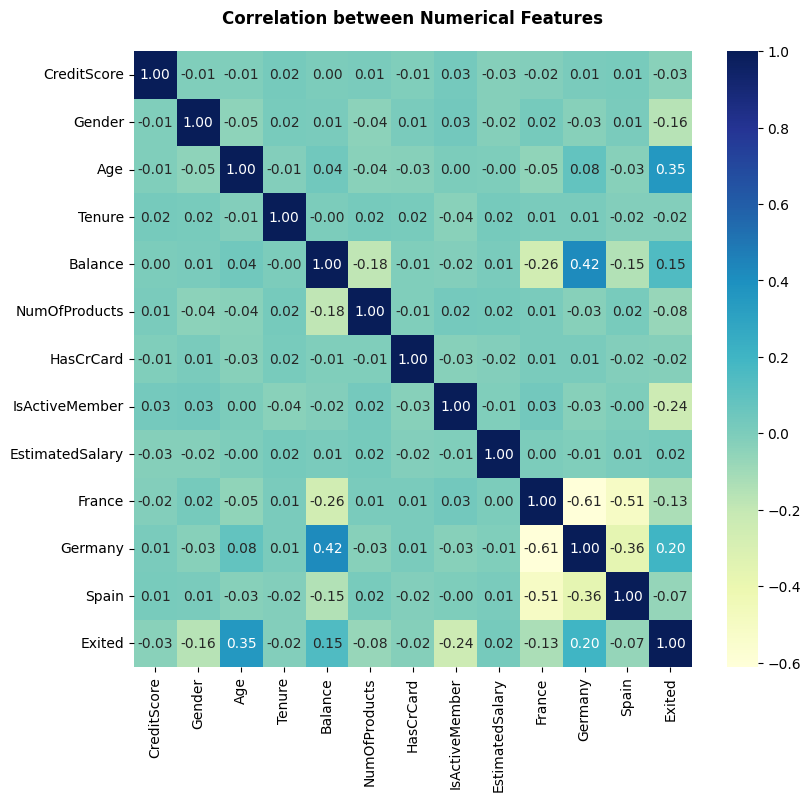

In [ ]:
#Heatmap Korelasi
plt.figure(figsize=(9, 8))
sns.heatmap(dataset.corr(), cmap='YlGnBu', annot=True, fmt='.2f')
plt.title('Correlation between Numerical Features', fontweight='bold', pad=20)
plt.show()

In [ ]:
#Tabel nilai korelasi berdarkan value corr terbesar
corr = dataset.corrwith(dataset["Exited"])
corr = corr.reset_index(name='corr value')
corr["Corr type"] = corr["corr value"].apply(lambda x : "Positif" if x >= 0 else "Negatif")
corr["corr value"] = corr["corr value"].apply(lambda x : abs(x))
corr.sort_values('corr value', ascending=False, ignore_index=True)

,index,corr value,Corr type
0,Exited,1.000000,Positif
1,Age,0.352535,Positif
2,IsActiveMember,0.236062,Negatif
3,Germany,0.196450,Positif
4,Gender,0.164668,Negatif
5,Balance,0.147338,Positif
6,France,0.130970,Negatif
7,NumOfProducts,0.075077,Negatif
8,Spain,0.065494,Negatif
9,CreditScore,0.034917,Negatif


In [ ]:
#Feature importance dengan regresi -> Metode OLS (Ordinary Least Square) untuk data Numeric
import statsmodels.api as sm

#Independent Feature (X)
X = dataset[['CreditScore', 'Age', 'Tenure', 'EstimatedSalary', 'NumOfProducts', 'Balance']]

#Dependent Feature (y)
y = dataset['Exited']

X = sm.add_constant(X)

#Model Linear Regresi
model = sm.OLS(y, X).fit()

#Summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Exited   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     448.9
Date:                Sat, 28 Oct 2023   Prob (F-statistic):               0.00
Time:                        05:30:55   Log-Likelihood:                -10314.
No. Observations:               15926   AIC:                         2.064e+04
Df Residuals:                   15919   BIC:                         2.070e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4624      0.005     

In [ ]:
#Feature importance dengan chi-square -> untuk data Categoric
from scipy.stats import chi2_contingency

Categoric = ['Gender', 'Germany', 'Spain', 'France', 'IsActiveMember', 'HasCrCard']
y = "Exited"

#Tabel Kontingensi
for i in Categoric:
    contingency_table = pd.crosstab(dataset[i], dataset[y])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Korelasi Chi-Square antara {i} dan {y}:")
    print(f"Nilai Chi-Square = {chi2}")
    print(f"Nilai p-value = {p}")
    print("")

Korelasi Chi-Square antara Gender dan Exited:
Nilai Chi-Square = 431.18394526985577
Nilai p-value = 8.978489367271899e-96

Korelasi Chi-Square antara Germany dan Exited:
Nilai Chi-Square = 613.7736867656279
Nilai p-value = 1.6903185483346628e-135

Korelasi Chi-Square antara Spain dan Exited:
Nilai Chi-Square = 68.00398934331704
Nilai p-value = 1.6316508259219456e-16

Korelasi Chi-Square antara France dan Exited:
Nilai Chi-Square = 272.6565324264982
Nilai p-value = 2.9918504759695194e-61

Korelasi Chi-Square antara IsActiveMember dan Exited:
Nilai Chi-Square = 886.529476762656
Nilai p-value = 8.320991191361414e-195

Korelasi Chi-Square antara HasCrCard dan Exited:
Nilai Chi-Square = 7.331610036312912
Nilai p-value = 0.0067752337526018145



Feature Selection: <br>
1. Data Numeric: Berdasarkan heatmap correlation, nilai korelasinya dan regresi linear (OLS) dapat dipertimbangkan untuk menghapus kolom 'Tenure' karena memiliki correlation value dan coef terkecil.
2. Data Categoric: Berdasarkan nilai Chi-Square dan P-Value yang diperoleh, data categoric dapat digunakan semua.

## Feature Extraction

In [ ]:
#Output One Hot Encoding (OHE)
geo_encod

,country_France,country_Germany,country_Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [ ]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


#### Notes: Feature Extraction berikut belum tentu akan digunakan dalam model Machine Learning nanti

In [ ]:
# Membuat feature 'AgeCategory'
# Klasifikasi Umur Menurut Departemen Kesehatan RI
# 0-5 tahun (Balita); 5-11 tahun (Kanak-Kanak); 12-25 tahun (Remaja); 26-45 tahun (Dewasa); 46-65 tahun (Lansia), > 65 tahun (Manula)
bins = [12, 25, 45, 65, 150]
labels = ['Remaja', 'Dewasa', 'Lansia', 'Manula']

df['Age_Category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Category
0,619,France,0,42,2,0.00,1,1,1,101348.88,1,Dewasa
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,Dewasa
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1,Dewasa
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,Dewasa
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,Dewasa
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0,Dewasa
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0,Dewasa
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1,Dewasa
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1,Dewasa


In [ ]:
#Klasifikasi Estimated Salary
bins = [0, 50000, 100000, 150000, 200000, float('inf')]
labels = ['Sangat Rendah', 'Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi']

df['Salary_Category'] = pd.cut(df['EstimatedSalary'], bins=bins, labels=labels, right=False, include_lowest=True)

df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Category,Salary_Category
0,619,France,0,42,2,0.00,1,1,1,101348.88,1,Dewasa,Sedang
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,Dewasa,Sedang
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1,Dewasa,Sedang
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,Dewasa,Rendah
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,Dewasa,Rendah
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0,Dewasa,Rendah
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0,Dewasa,Sedang
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1,Dewasa,Sangat Rendah
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1,Dewasa,Rendah


In [ ]:
#Nasabah memiliki kartu kredit dan sebagai active member
df['Aktif & Credit card'] = (df['IsActiveMember'] & df['HasCrCard']).astype(int)

df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Category,Salary_Category,Aktif & Credit card
0,619,France,0,42,2,0.00,1,1,1,101348.88,1,Dewasa,Sedang,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,Dewasa,Sedang,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1,Dewasa,Sedang,0
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,Dewasa,Rendah,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,Dewasa,Rendah,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0,Dewasa,Rendah,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0,Dewasa,Sedang,1
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1,Dewasa,Sangat Rendah,0
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1,Dewasa,Rendah,0
